# ETL Pipeline Preparation

For this Disaster Response Pipeline project, as always we will apply the CRISP-DM method:
1. Business Understanding
1. Data Understanding
1. Data Preparation
1. Modeling
1. Evaluation
1. Deployment

In this Jupyter notebook, we will apply the first 3 steps of the CRISP-DM method to create the ETL pipeline. The next three step for building the model will be carried out in a separate notebook

### Step 1: Business understanding
The goal of this project is to build a machine learning model, that class classify a message into relevant categories. Here is the full list of categories we will be identifying:
    - 'related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military',
    'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire',
 'earthquake', 'cold', 'other_weather', 'direct_report'
 
Here is an actual sample text message:
- "Is the Hurricane over or is it not over"

For this message, these are the categories that were marked as positive:
   - related
   - aid_related
   - other_aid
   - weather_related
   - storm

### Step 2: Data Understanding
- Import libraries and load datasets.
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [3]:
# import libraries
import pandas as pd

In [6]:
# load messages dataset
messages = pd.read_csv("../data/disaster_messages.csv")
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [7]:
messages.genre.value_counts()

news      13068
direct    10782
social     2398
Name: genre, dtype: int64

In [8]:
messages.shape

(26248, 4)

In [9]:
import numpy as np
np.sum(messages.isnull())

id              0
message         0
original    16064
genre           0
dtype: int64

In [10]:
print("Total ID count:", len(messages.id))
print("Unique ID count:", len(messages.id.unique()))

Total ID count: 26248
Unique ID count: 26180


In [11]:
messages[messages.id.duplicated()].shape

(68, 4)

In [12]:
# There are 68 rows that are duplicated in the messages.
duplicatedMessageID = messages[messages.id.duplicated()]["id"]

In [13]:
# load categories dataset
categories = pd.read_csv("../data/disaster_categories.csv")
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


In [14]:
print(categories.iloc[0].categories)

related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-0;infrastructure_related-0;transport-0;buildings-0;electricity-0;tools-0;hospitals-0;shops-0;aid_centers-0;other_infrastructure-0;weather_related-0;floods-0;storm-0;fire-0;earthquake-0;cold-0;other_weather-0;direct_report-0


In [15]:
np.sum(categories.isnull())

id            0
categories    0
dtype: int64

In [16]:
categories.shape

(26248, 2)

In [17]:
print("Total ID count:", len(categories.id))
print("Unique ID count:", len(categories.id.unique()))

Total ID count: 26248
Unique ID count: 26180


### Step 3: Data preparation
We can see there are some duplicated rows here. We will start cleaning up the data and also merging the message data with the marked category data
    

In [23]:
duplicatedCategoriesID = categories[categories.id.duplicated()]["id"]

In [24]:
idsInBothMessageAndCategory = set(messages.id.values).intersection(set(categories.id.values))

In [25]:
len(idsInBothMessageAndCategory)

26180

In [26]:
#Drop the duplicated messages and categories
messages = messages.drop_duplicates(subset="id")
messages.shape

(26180, 4)

In [27]:
categories = categories.drop_duplicates(subset="id")
categories.shape

(26180, 2)

#### Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [28]:
# merge datasets
df = messages.merge(categories, left_on='id', right_on='id', how='inner')
df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


In [29]:
df.shape

(26180, 5)

In [30]:
df[df["original"].isnull()].head()

,id,message,original,genre,categories
7408,8365,NOTES: It mark as not enough information,NaN,direct,related-0;request-0;offer-0;aid_related-0;medi...
9875,11186,My thoughts and prayers go out to all the live...,NaN,social,related-1;request-0;offer-0;aid_related-0;medi...
9876,11188,I m sorry for the poor people in Haiti tonight...,NaN,social,related-1;request-0;offer-0;aid_related-0;medi...
9877,11189,RT selenagomez UNICEF has just announced an em...,NaN,social,related-1;request-0;offer-0;aid_related-1;medi...
9878,11192,lilithia yes 5.2 magnitude earthquake hit mani...,NaN,social,related-1;request-0;offer-0;aid_related-0;medi...


In [31]:
np.sum(df.isnull())

id                0
message           0
original      16027
genre             0
categories        0
dtype: int64

In [32]:
df.shape

(26180, 5)

#### Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [33]:
# create a dataframe of the 36 individual category columns
categories = categories["categories"].str.split(";", expand=True)
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [34]:
categories.shape

(26180, 36)

In [35]:
# select the first row of the categories dataframe
row = categories.iloc[0]
row

0                    related-1
1                    request-0
2                      offer-0
3                aid_related-0
4               medical_help-0
5           medical_products-0
6          search_and_rescue-0
7                   security-0
8                   military-0
9                child_alone-0
10                     water-0
11                      food-0
12                   shelter-0
13                  clothing-0
14                     money-0
15            missing_people-0
16                  refugees-0
17                     death-0
18                 other_aid-0
19    infrastructure_related-0
20                 transport-0
21                 buildings-0
22               electricity-0
23                     tools-0
24                 hospitals-0
25                     shops-0
26               aid_centers-0
27      other_infrastructure-0
28           weather_related-0
29                    floods-0
30                     storm-0
31                      fire-0
32      

In [36]:
# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing

category_colnames = pd.Series(categories.iloc[0]).apply(lambda x: x[:-2]).values
print(category_colnames)

['related' 'request' 'offer' 'aid_related' 'medical_help'
 'medical_products' 'search_and_rescue' 'security' 'military'
 'child_alone' 'water' 'food' 'shelter' 'clothing' 'money'
 'missing_people' 'refugees' 'death' 'other_aid' 'infrastructure_related'
 'transport' 'buildings' 'electricity' 'tools' 'hospitals' 'shops'
 'aid_centers' 'other_infrastructure' 'weather_related' 'floods' 'storm'
 'fire' 'earthquake' 'cold' 'other_weather' 'direct_report']


In [37]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [38]:
np.sum(categories.isnull())

related                   0
request                   0
offer                     0
aid_related               0
medical_help              0
medical_products          0
search_and_rescue         0
security                  0
military                  0
child_alone               0
water                     0
food                      0
shelter                   0
clothing                  0
money                     0
missing_people            0
refugees                  0
death                     0
other_aid                 0
infrastructure_related    0
transport                 0
buildings                 0
electricity               0
tools                     0
hospitals                 0
shops                     0
aid_centers               0
other_infrastructure      0
weather_related           0
floods                    0
storm                     0
fire                      0
earthquake                0
cold                      0
other_weather             0
direct_report       

#### Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [39]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] = categories[column].apply(lambda x: x[-1:])
    
    # convert column from string to numeric
    categories[column] = categories[column].astype('int32')
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
categories.shape

(26180, 36)

#### Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [41]:
np.sum(df.isnull())

id                0
message           0
original      16027
genre             0
categories        0
dtype: int64

In [42]:
np.sum(categories.isnull())

related                   0
request                   0
offer                     0
aid_related               0
medical_help              0
medical_products          0
search_and_rescue         0
security                  0
military                  0
child_alone               0
water                     0
food                      0
shelter                   0
clothing                  0
money                     0
missing_people            0
refugees                  0
death                     0
other_aid                 0
infrastructure_related    0
transport                 0
buildings                 0
electricity               0
tools                     0
hospitals                 0
shops                     0
aid_centers               0
other_infrastructure      0
weather_related           0
floods                    0
storm                     0
fire                      0
earthquake                0
cold                      0
other_weather             0
direct_report       

In [43]:
# drop the original categories column from `df`
df = df.drop('categories', axis=1)
df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [44]:
df.shape

(26180, 4)

In [45]:
#Had to reset index before concatenating
df.reset_index(drop=True, inplace=True)
categories.reset_index(drop=True, inplace=True)

In [46]:
# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([df, categories], axis=1)
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df.shape

(26180, 40)

In [48]:
np.sum(df.isnull())

id                            0
message                       0
original                  16027
genre                         0
related                       0
request                       0
offer                         0
aid_related                   0
medical_help                  0
medical_products              0
search_and_rescue             0
security                      0
military                      0
child_alone                   0
water                         0
food                          0
shelter                       0
clothing                      0
money                         0
missing_people                0
refugees                      0
death                         0
other_aid                     0
infrastructure_related        0
transport                     0
buildings                     0
electricity                   0
tools                         0
hospitals                     0
shops                         0
aid_centers                   0
other_in

#### Verify there are no more duplicates.

In [49]:
# check number of duplicates
duplicated_rows = df[df["id"].duplicated()]["id"].unique()
duplicated_rows

array([], dtype=int64)

In [50]:
len(duplicated_rows)

0

In [51]:
np.sum(df.isnull())

id                            0
message                       0
original                  16027
genre                         0
related                       0
request                       0
offer                         0
aid_related                   0
medical_help                  0
medical_products              0
search_and_rescue             0
security                      0
military                      0
child_alone                   0
water                         0
food                          0
shelter                       0
clothing                      0
money                         0
missing_people                0
refugees                      0
death                         0
other_aid                     0
infrastructure_related        0
transport                     0
buildings                     0
electricity                   0
tools                         0
hospitals                     0
shops                         0
aid_centers                   0
other_in

In [52]:
# drop duplicates
df = df.drop_duplicates()

In [53]:
# check number of duplicates
duplicated_rows = df[df["id"].duplicated()]["id"].unique()
duplicated_rows

array([], dtype=int64)

#### One last check before we save the data.
Since there are so many different categories, we want to take a look at how much sample data we have, that actually are marked for each of the categories.

In [58]:
from matplotlib import pyplot
import seaborn as sns

In [59]:
cat_available = np.sum(df[[item for item in df.columns if item not in ['id', 'message', 'original', 'genre']]]).sort_values(ascending=False)

In [60]:
def formatPlots():
    """
    Description: This function is a simple script to help us reuse styling codes in one place

    Arguments:
        None

    Returns: None
    """
    sns.set(style="whitegrid")
    sns.set_context("talk")
    fig, ax = pyplot.subplots(figsize=(12,6))    
    pyplot.xticks(rotation=90)

Text(0.5, 1.0, 'Available message count by category')

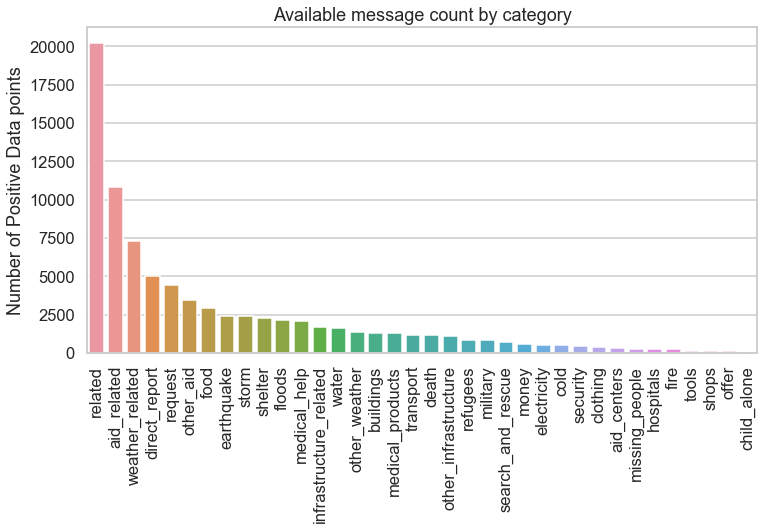

In [61]:
formatPlots()
chart = sns.barplot(x=cat_available.index, y=cat_available)
chart.set_ylabel("Number of Positive Data points")
chart.set_title("Available message count by category")

### Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [92]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///disaster_data.db')
df.to_sql('DisasterData', engine, index=False)

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.